In [5]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [6]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [7]:
!pip install kaggle


In [8]:
kaggle_credentails = json.load(open('kaggle.json'))

In [9]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']

In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:18<00:00, 41.6MB/s]
100% 2.04G/2.04G [00:18<00:00, 116MB/s] 


In [11]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [12]:
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref :
  zip_ref.extractall()

In [13]:
print(os.listdir('plantvillage dataset'))
#printing subdirectories in that db

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])
#subfolders present in each folders,since it's listdir it's in array/list

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['segmented', 'color', 'grayscale']
38
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Tomato___Septoria_leaf_spot']
38
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Tomato___Septoria_leaf_spot']
38
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Tomato___Septoria_leaf_spot']


In [14]:
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

423
['116c65e1-9d66-4aee-b151-6b8cd8319c2d___Mt.N.V_HL 9106.JPG', '0ec29818-c70e-4586-9481-3201a67b7910___Mt.N.V_HL 6175.JPG', '8a5dff69-180d-4a14-b8e1-b9e1374202c5___Mt.N.V_HL 6098.JPG', '452823c1-22d2-4bce-a4cc-8ad014421261___Mt.N.V_HL 6199.JPG', '36add77f-5e02-41b0-97e7-b1c14f91acfc___Mt.N.V_HL 6120.JPG']


In [15]:
#training model with color images for better recognition ,starting with preprocessing
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


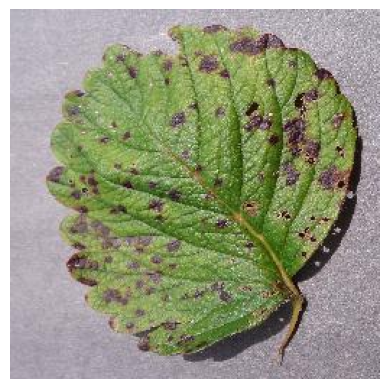

In [16]:
#displaying an image
image_path = '/content/plantvillage dataset/color/Strawberry___Leaf_scorch/08d4f54d-2676-4ce4-8f76-ca89b7b199fe___RS_L.Scorch 1316.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off') #to avoid displaying pixel number/axis number
plt.show()

In [17]:
img_size = 224
batch_size = 32

In [18]:
#imported from tensorflow
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 #keeping 20%dataset for validation
)

In [19]:
train_generator = data_gen.flow_from_directory (
    base_dir,
    target_size =(img_size , img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [20]:
validation_generator = data_gen.flow_from_directory (
    base_dir,
    target_size =(img_size , img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 67ms/step - accuracy: 0.6061 - loss: 1.6229 - val_accuracy: 0.8708 - val_loss: 0.4136
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9236 - loss: 0.2475 - val_accuracy: 0.8684 - val_loss: 0.4067
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 64ms/step - accuracy: 0.9666 - loss: 0.1014 - val_accuracy: 0.8724 - val_loss: 0.4797
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.9775 - loss: 0.0674 - val_accuracy: 0.8943 - val_loss: 0.4281
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9831 - loss: 0.0534 - val_accuracy: 0.8807 - val_loss: 0.5352


In [27]:
print("Evaluating model...")
val_loss , val_accuracy = model.evaluate(validation_generator, steps= validation_generator.samples // batch_size)
print("Validation accuracy:, {val_accuracy * 100 :.2f}% ")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8800 - loss: 0.5365
Validation accuracy:, {val_accuracy * 100 :.2f}% 


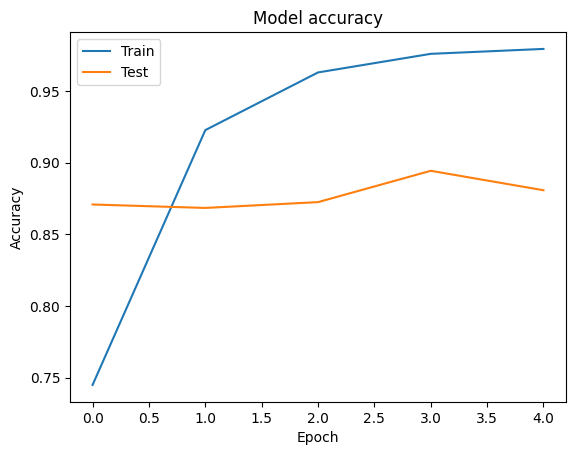

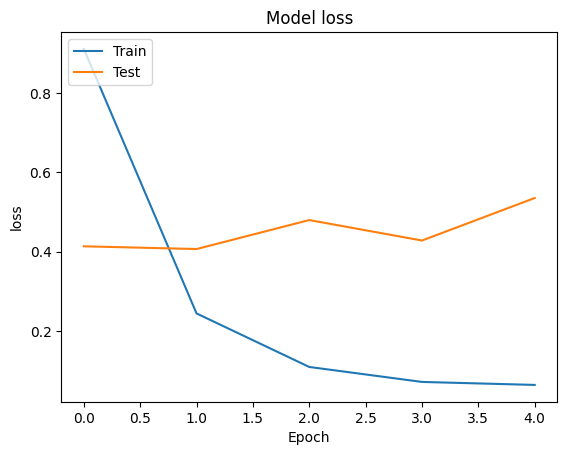

In [28]:
plt.plot(history.history['accuracy'],label='accuracy')  #training&validation accuracy
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

plt.plot(history.history['loss'],label='loss')  #training&validation loss
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

In [29]:
def load_and_preprocess_image(image_path, target_size=(224,224)):  #using pillow
  img = Image.open(image_path) #load
  img = img.resize(target_size) #resize
  img_array = np.array(img) #converting to array
  img_array = np.expand_dims(img_array, axis=0) #batch dim
  img_array = img_array.astype('float32')/255.0 #scale img values to[0,1]
  return img_array

def predict_image_class(model,image_path,class_indices):  #predict class of img-diseased?healthy?
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions,axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [30]:
class_indices ={v:k for k, v in train_generator.class_indices.items()} #mapping from class indices to class names
class_indices
json.dump(class_indices,open('class_indices.json','w')) #saving class names as json file

In [32]:
image_path = '/content/corn_northern.JPG'
predicted_class_name = predict_image_class(model,image_path,class_indices)
print(f"The predicted class for the image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class for the image is: Corn_(maize)___Northern_Leaf_Blight


In [34]:
model.save('drive/MyDrive/ColabNotebooks/plant_disease_prediction_model.h5')